# Collecting

Relevant imports:

In [1]:
import pandas as pd

In [15]:
import nltk
import requests
!pip install PRAW
import praw
import datetime
from datetime import date
from pathlib import Path

  Using cached praw-7.7.0-py3-none-any.whl (189 kB)
  Using cached prawcore-2.3.0-py3-none-any.whl (16 kB)
  Using cached update_checker-0.18.0-py3-none-any.whl (7.0 kB)


In [2]:
#CREDENTIALS
reddit = praw.Reddit(user_agent='VAD', client_id='07P7Bbqv6LfkOGMpISTYLg', \
                     client_secret="YjiQnecZTJYj9jcdr8gAlItUSKXAcw", username='Ja5-hand5', password='G7zUpApEaM')

Data source: https://www.reddit.com/r/COVID19/ (Reddit)

In [3]:
#SUBREDDIT
subredditpage = reddit.subreddit("COVID19")

In [4]:
#RETRIEVING SUBMISSIONS
submissions = [submission for submission in subredditpage.top(limit=None)]

In [5]:
#QUANTITY OF SUBMISSIONS
len(submissions)

996

In [22]:
#RETRIEVING DATA
titles = [t.title for t in submissions]
flairs = [flair.link_flair_text for flair in submissions]
redditors = [r.author for r in submissions]
ids = [i.id for i in submissions]
#time = [tm.created_utc for tm in submissions]
#dates = [date.fromtimestamp(d) for d in time]
dates = [date.fromtimestamp(d) for d in [tm.created_utc for tm in submissions]]
acceptable = [a.over_18 for a in submissions]

In [23]:
#CREATING A DATAFRAME
df = pd.DataFrame()

df['Submission_Title'] = titles
df['Submission_ID'] = ids
df['Date'] = dates
df['Redditor'] = redditors
df['Flair_Type'] = flairs
df['Safe_Content'] = acceptable

In [43]:
display(df.head(10)) #view

Submission_Title Submission_ID  \
0   Stanford researchers confirm N95 masks can be ...        fo0rpe   
1   Number of people with coronavirus infections m...        g2czc4   
2   At least 11% of tested blood donors in Stockho...        g4znbg   
3   Ending coronavirus lockdowns will be a dangero...        g1hpwu   
4   NYC Health: Only 1.8% of deaths in New York Ci...        ftlqqx   
5   Not wearing masks to protect against coronavir...        fqdq90   
6   In a paper from 2007, researches warned re-eme...        flnnz6   
7   Antibody tests suggest that coronavirus infect...        g4oj23   
8   Correcting under-reported COVID-19 case number...        fm43z9   
9   Amid Ongoing Covid-19 Pandemic, Governor Cuomo...        gcb7cx   
10  Study Finds Nearly Everyone Who Recovers From ...        gffi2i   
11  Amid Ongoing COVID-19 Pandemic, Governor Cuomo...        g99qkr   
12                    New Zealand eliminates COVID-19        gfzvdx   
13  World's 1st inactivated COVID-19 vaccine produ...        hf6069   
14  Evidence that Vitamin D Supplementation Could ...        fyblga   
15  Please consider downloading BOINC or folding@h...        fd29vj   
16  Pfizer Inc. - Pfizer and BioNTech Announce Vac...        jqwa2z   
17  Human trials for Covid19 vaccine to begin on T...        g5lo2t   
18  SARS-COV-2 was already spreading in France in ...        gdg00l   
19  Low-cost dexamethasone reduces death by up to ...        ha2p56   

          Date       Redditor          Flair_Type  Safe_Content  
0   2020-03-24       crispy88     Academic Report         False  
1   2020-04-16      matakos18       Press Release         False  
2   2020-04-20       simonsky     STUDY RETRACTED         False  
3   2020-04-15       Johari82     Academic Report         False  
4   2020-04-02  afieldonearth  Data Visualization         False  
5   2020-03-28            xvs    Academic Comment         False  
6   2020-03-20     coke_queen     Academic Report         False  
7   2020-04-20   valleyofdawn    Academic Comment         False  
8   2020-03-20           None     Academic Report         False  
9   2020-05-02         cegras       Press Release         False  
10  2020-05-07     mankikned1    Academic Comment         False  
11  2020-04-27       verdantx       Press Release         False  
12  2020-05-08     mankikned1        Epidemiology         False  
13  2020-06-24         KuduIO       Press Release         False  
14  2020-04-10     mrdroneman     Academic Report         False  
15  2020-03-03           None             General         False  
16  2020-11-09  vladmuresan02       Press Release         False  
17  2020-04-21        beano91    Vaccine Research         False  
18  2020-05-04    MummersFart            Preprint         False  
19  2020-06-16          cokea       Press Release         False

# Preparing

Relevant imports:

In [82]:
#TO CVS
filepath = Path('covid19_subreddit_submissions.csv')  
df.to_csv(filepath, index=False, header=True)

In [6]:
from collections import Counter

In [7]:
dfr = pd.read_csv('covid19_subreddit_submissions.csv')
dfr.head(50)

Submission_Title Submission_ID  \
0   Stanford researchers confirm N95 masks can be ...        fo0rpe   
1   Number of people with coronavirus infections m...        g2czc4   
2   At least 11% of tested blood donors in Stockho...        g4znbg   
3   Ending coronavirus lockdowns will be a dangero...        g1hpwu   
4   NYC Health: Only 1.8% of deaths in New York Ci...        ftlqqx   
5   Not wearing masks to protect against coronavir...        fqdq90   
6   In a paper from 2007, researches warned re-eme...        flnnz6   
7   Antibody tests suggest that coronavirus infect...        g4oj23   
8   Correcting under-reported COVID-19 case number...        fm43z9   
9   Amid Ongoing Covid-19 Pandemic, Governor Cuomo...        gcb7cx   
10  Study Finds Nearly Everyone Who Recovers From ...        gffi2i   
11  Amid Ongoing COVID-19 Pandemic, Governor Cuomo...        g99qkr   
12                    New Zealand eliminates COVID-19        gfzvdx   
13  World's 1st inactivated COVID-19 vaccine produ...        hf6069   
14  Evidence that Vitamin D Supplementation Could ...        fyblga   
15  Please consider downloading BOINC or folding@h...        fd29vj   
16  Pfizer Inc. - Pfizer and BioNTech Announce Vac...        jqwa2z   
17  Human trials for Covid19 vaccine to begin on T...        g5lo2t   
18  SARS-COV-2 was already spreading in France in ...        gdg00l   
19  Low-cost dexamethasone reduces death by up to ...        ha2p56   
20  New blood tests for antibodies could show true...        fr4yg2   
21  Oxford COVID-19 vaccine to begin phase II/III ...        gofoxk   
22  T cells found in COVID-19 patients ‘bode well’...        gk25s2   
23  The FDA-approved Drug Ivermectin inhibits the ...        fu6zi0   
24  A large COVID-19 outbreak in a high school 10 ...        hwh4sg   
25  Vitamin D levels appear to play role in COVID-...        gitsbr   
26  Vitamin D Insufficiency is Prevalent in Severe...        g9qtgu   
27  From ‘brain fog’ to heart damage, COVID-19’s l...        i1plof   
28  How blood from coronavirus survivors might kee...        fojcnf   
29  ‘Absolutely remarkable’: No one who got Modern...        k3w871   
30  U of T tests show Canadian-made mask deactivat...        hs9tna   
31  WHO launches global megatrial of the four most...        fni2al   
32  Coronavirus Could Be a 'Chimera' of Two Differ...        fppltz   
33  “We were able to ascertain that patients who h...        fkizd0   
34  Body temperature screening to identify SARS-Co...        i43o7i   
35  First study of COVID-19 patients with diabetes...        guibcg   
36  Face Masks Considerably Reduce COVID-19 Cases ...        gz0ds3   
37  Comorbidities in Italy up to march 20th. Nearl...        fn0dch   
38  University of Minnesota Trial Shows Hydroxychl...        gw283s   
39  The subway seeded the massive coronavirus epid...        g3jufj   
40  UChicago Medicine doctors see 'truly remarkabl...        g7kr1o   
41  Covid-19: Two thirds of people contacted throu...        gt0992   
42  Men's blood contains greater concentrations of...        ghobbc   
43  Greater social distancing could curb COVID-19 ...        ft958n   
44  Moderna’s COVID-19 Vaccine Candidate Meets its...        jv5mnc   
45  Vitamin D Sufficiency Reduced Risk for Morbidi...        hx2le9   
46  COVID-19: On average only 6% of actual SARS-Co...        fwinf2   
47  Data from SARS outbreak showed that mask weari...        ffy8av   
48  Saliva is more sensitive for SARS-CoV-2 detect...        g64ygs   
49  Vitamin D determines severity in COVID-19 so g...        gq5hf5   

          Date             Redditor           Flair_Type  Safe_Content  
0   2020-03-24             crispy88      Academic Report         False  
1   2020-04-16            matakos18        Press Release         False  
2   2020-04-20             simonsky      STUDY RETRACTED         False  
3   2020-04-15             Johari82      Academic Report         False  
4   2020-04-02        afieldonearth   Data Visuali

In [12]:
#REMOVE ROWS WHERE EMPTY VALUE FOR Flair_Type
df2 = dfr.dropna(subset = ['Flair_Type'])

In [9]:
#RETRIEVING LIST FLAIR TYPES
flairs_list = list(df2['Flair_Type']) #list of flairs

flair_types = [] 
for fl in flairs_list:
    if fl not in flair_types:
        flair_types.append(fl)
    else:
        pass

In [10]:
#FINDING MOST COMMON FLAIR TYPES
frequent_occur = Counter(flairs_list).most_common(10)
frequent_occur

[('Press Release', 236),
 ('Preprint', 199),
 ('Academic Report', 123),
 ('Academic Comment', 102),
 ('General', 88),
 ('Epidemiology', 50),
 ('Vaccine Research', 46),
 ('Clinical', 37),
 ('Government Agency', 22),
 ('Antivirals', 21)]

In [11]:
#CREATE DICTIONARY
#dictionary = {key:value for key, value in zip(list(dfr['Submission_Title']), list(dfr['Flair_Type']))}

#TEST DICTIONARY
#list(dictionary.values()) == list(dfr['Flair_Type']) #false
#list(dictionary.keys()) == list(dfr['Submission_Title']) #false

#len(list(dictionary.values())) #993
#len(list(dfr['Flair_Type'])) #996
#what is missing?

#Not = []
#In = []
#for t1 in list(dictionary.keys()):
#    if t1 in list(dfr['Submission_Title']):
#        In.append(t1)
#    else:
#        Not.append(t1)
    
#len(In) #993
#len(Not) #0

#not missing anything - check if repeats:
#occur = Counter(list(dfr['Submission_Title'])).most_common(5)
#occur #yes 3 items repeated and not included in dictionary

#Check if different flair types or entirely repeated:
#dfr[dfr['Submission_Title']==occur[0][0]]

#same submission but different flair types - dictionary will not work - doesn't allow repeates

Submission_Title Submission_ID  \
62   Reinfection could not occur in SARS-CoV-2 infe...        foz6s7   
895  Reinfection could not occur in SARS-CoV-2 infe...        fiug2w   

           Date  Redditor Flair_Type  Safe_Content  
62   2020-03-25  Redfour5   Clinical         False  
895  2020-03-15  Kmlevitt   Preprint         False

In [174]:
# #DICTIONARY DF
# dfrd = pd.DataFrame()
# dfrd['Title'] = dictionary.keys()
# dfrd['Flair'] = dictionary.values()

In [13]:
#LIST OF TITLES PER FLAIR TYPE
Press = list(df2.query('Flair_Type == "Press Release"')['Submission_Title'])
Print = list(df2.query('Flair_Type == "Preprint"')['Submission_Title'])
AcRe = list(df2.query('Flair_Type == "Academic Report"')['Submission_Title'])
AcCo = list(df2.query('Flair_Type == "Academic Comment"')['Submission_Title'])
Gen = list(df2.query('Flair_Type == "General"')['Submission_Title'])

#top = [Press, Print, AcRe, AcCo, Gen] 

Acad = AcRe + AcCo #group two academic flairs

# Processing

Relevant imports:

In [16]:
from nltk.stem import WordNetLemmatizer as WNL
lemmatizer = WNL
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
nltk.download('punkt')
import string
punct = list(string.punctuation)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
# from nltk import stem
# stemmer = stem.PorterStemmer()

In [17]:
from nltk.metrics import jaccard_distance

Flair: Press Release

In [18]:
#TOKENIZE
Press_C = [w.encode('ascii', 'ignore') for w in Press]
Press_D = [w.decode('ascii', 'ignore') for w in Press_C]
Press_D #list of submissions under chosen flair no special char

Press_TokensLists = [word_tokenize(subm.lower()) for subm in Press_D]
Press_TokensLists #list lists, each containing tokenized submission 

[['number',
  'of',
  'people',
  'with',
  'coronavirus',
  'infections',
  'may',
  'be',
  'dozens',
  'of',
  'times',
  'higher',
  'than',
  'the',
  'number',
  'of',
  'confirmed',
  'cases'],
 ['amid',
  'ongoing',
  'covid-19',
  'pandemic',
  ',',
  'governor',
  'cuomo',
  'announces',
  'results',
  'of',
  'completed',
  'antibody',
  'testing',
  'study',
  'of',
  '15,000',
  'people',
  'show',
  '12.3',
  'percent',
  'of',
  'population',
  'has',
  'covid-19',
  'antibodies'],
 ['amid',
  'ongoing',
  'covid-19',
  'pandemic',
  ',',
  'governor',
  'cuomo',
  'announces',
  'phase',
  'ii',
  'results',
  'of',
  'antibody',
  'testing',
  'study',
  'show',
  '14.9',
  '%',
  'of',
  'population',
  'has',
  'covid-19',
  'antibodies'],
 ['world',
  "'s",
  '1st',
  'inactivated',
  'covid-19',
  'vaccine',
  'produces',
  'antibodies'],
 ['pfizer',
  'inc.',
  '-',
  'pfizer',
  'and',
  'biontech',
  'announce',
  'vaccine',
  'candidate',
  'against',
  'covid-

In [19]:
#REGULARIZE
Press_word_lists = [] #list of lists, each just word/no. tokens
for t_li in Press_TokensLists:
    Press_word_list = [] #list of just word/no. tokens
    for token in t_li:
        if token not in punct and token not in stops:
            Press_word_list.append(token)
        else:
            pass
    Press_word_lists.append(Press_word_list)
Press_word_lists

Press_wordnn_lists = [] #list of lists, each just word tokens
for t_li in Press_word_lists:
    Press_wordnn_list = [] #list of just word tokens
    for token in t_li:
        if token.isalpha():
            Press_wordnn_list.append(token)
        else:
            pass
    Press_wordnn_lists.append(Press_wordnn_list)
Press_wordnn_lists

[['number',
  'people',
  'coronavirus',
  'infections',
  'may',
  'dozens',
  'times',
  'higher',
  'number',
  'confirmed',
  'cases'],
 ['amid',
  'ongoing',
  'pandemic',
  'governor',
  'cuomo',
  'announces',
  'results',
  'completed',
  'antibody',
  'testing',
  'study',
  'people',
  'show',
  'percent',
  'population',
  'antibodies'],
 ['amid',
  'ongoing',
  'pandemic',
  'governor',
  'cuomo',
  'announces',
  'phase',
  'ii',
  'results',
  'antibody',
  'testing',
  'study',
  'show',
  'population',
  'antibodies'],
 ['world', 'inactivated', 'vaccine', 'produces', 'antibodies'],
 ['pfizer',
  'pfizer',
  'biontech',
  'announce',
  'vaccine',
  'candidate',
  'achieved',
  'success',
  'first',
  'interim',
  'analysis',
  'phase',
  'study'],
 ['dexamethasone',
  'reduces',
  'death',
  'one',
  'third',
  'hospitalised',
  'patients',
  'severe',
  'respiratory',
  'complications'],
 ['oxford', 'vaccine', 'begin', 'phase', 'human', 'trials'],
 ['university',
  'min

In [20]:
#LEMMATIZE    
Press_lemma_lists = []
for w_li in Press_wordnn_lists:
    Press_lemma_list = []
    for word in w_li:
        Press_lemma_list.append(lemmatizer.lemmatize(word, word))
    Press_lemma_lists.append(Press_lemma_list)
Press_lemma_lists

[['number',
  'people',
  'coronavirus',
  'infection',
  'may',
  'dozen',
  'time',
  'higher',
  'number',
  'confirmed',
  'case'],
 ['amid',
  'ongoing',
  'pandemic',
  'governor',
  'cuomo',
  'announces',
  'result',
  'completed',
  'antibody',
  'testing',
  'study',
  'people',
  'show',
  'percent',
  'population',
  'antibody'],
 ['amid',
  'ongoing',
  'pandemic',
  'governor',
  'cuomo',
  'announces',
  'phase',
  'ii',
  'result',
  'antibody',
  'testing',
  'study',
  'show',
  'population',
  'antibody'],
 ['world', 'inactivated', 'vaccine', 'produce', 'antibody'],
 ['pfizer',
  'pfizer',
  'biontech',
  'announce',
  'vaccine',
  'candidate',
  'achieved',
  'success',
  'first',
  'interim',
  'analysis',
  'phase',
  'study'],
 ['dexamethasone',
  'reduces',
  'death',
  'one',
  'third',
  'hospitalised',
  'patient',
  'severe',
  'respiratory',
  'complication'],
 ['oxford', 'vaccine', 'begin', 'phase', 'human', 'trial'],
 ['university',
  'minnesota',
  'tria

Flair: Preprint

In [21]:
#TOKENIZE
Print_C = [w.encode('ascii', 'ignore') for w in Print]
Print_D = [w.decode('ascii', 'ignore') for w in Print_C]
Print_D #list of submissions under chosen flair no special char

Print_TokensLists = [word_tokenize(subm.lower()) for subm in Print_D]
Print_TokensLists #list lists, each containing tokenized submission 

[['sars-cov-2',
  'was',
  'already',
  'spreading',
  'in',
  'france',
  'in',
  'late',
  'december',
  '2019'],
 ['the',
  'fda-approved',
  'drug',
  'ivermectin',
  'inhibits',
  'the',
  'replication',
  'of',
  'sars-cov-2',
  'in',
  'vitro'],
 ['vitamin',
  'd',
  'insufficiency',
  'is',
  'prevalent',
  'in',
  'severe',
  'covid-19'],
 ['face',
  'masks',
  'considerably',
  'reduce',
  'covid-19',
  'cases',
  'in',
  'germany',
  ':',
  'a',
  'synthetic',
  'control',
  'method',
  'approach'],
 ['vitamin',
  'd',
  'sufficiency',
  'reduced',
  'risk',
  'for',
  'morbidity',
  'and',
  'mortality',
  'in',
  'covid-19',
  'patients'],
 ['saliva',
  'is',
  'more',
  'sensitive',
  'for',
  'sars-cov-2',
  'detection',
  'in',
  'covid-19',
  'patients',
  'than',
  'nasopharyngeal',
  'swabs'],
 ['covid-19',
  'outbreak',
  'associated',
  'with',
  'air',
  'conditioning',
  'in',
  'restaurant',
  ',',
  'guangzhou',
  ',',
  'china'],
 ['chadox1',
  'ncov-19',
  'v

In [22]:
#REGULARIZE
Print_word_lists = [] #list of lists, each just word/no. tokens
for t_li in Print_TokensLists:
    Print_word_list = [] #list of just word/no. tokens
    for token in t_li:
        if token not in punct and token not in stops:
            Print_word_list.append(token)
        else:
            pass
    Print_word_lists.append(Print_word_list)
Print_word_lists

Print_wordnn_lists = [] #list of lists, each just word tokens
for t_li in Print_word_lists:
    Print_wordnn_list = [] #list of just word tokens
    for token in t_li:
        if token.isalpha():
            Print_wordnn_list.append(token)
        else:
            pass
    Print_wordnn_lists.append(Print_wordnn_list)
Print_wordnn_lists

[['already', 'spreading', 'france', 'late', 'december'],
 ['drug', 'ivermectin', 'inhibits', 'replication', 'vitro'],
 ['vitamin', 'insufficiency', 'prevalent', 'severe'],
 ['face',
  'masks',
  'considerably',
  'reduce',
  'cases',
  'germany',
  'synthetic',
  'control',
  'method',
  'approach'],
 ['vitamin',
  'sufficiency',
  'reduced',
  'risk',
  'morbidity',
  'mortality',
  'patients'],
 ['saliva', 'sensitive', 'detection', 'patients', 'nasopharyngeal', 'swabs'],
 ['outbreak',
  'associated',
  'air',
  'conditioning',
  'restaurant',
  'guangzhou',
  'china'],
 ['vaccination', 'prevents', 'pneumonia', 'rhesus', 'macaques'],
 ['vitamin',
  'supplementation',
  'could',
  'possibly',
  'improve',
  'clinical',
  'outcomes',
  'patients',
  'infected'],
 ['loss',
  'smell',
  'taste',
  'combination',
  'symptoms',
  'strong',
  'predictor',
  'infection'],
 ['majority',
  'male',
  'patients',
  'present',
  'low',
  'testosterone',
  'levels',
  'admission',
  'intensive',
  

In [23]:
#LEMMATIZE    
Print_lemma_lists = []
for w_li in Print_wordnn_lists:
    Print_lemma_list = []
    for word in w_li:
        Print_lemma_list.append(lemmatizer.lemmatize(word, word))
    Print_lemma_lists.append(Print_lemma_list)
Print_lemma_lists

[['already', 'spreading', 'france', 'late', 'december'],
 ['drug', 'ivermectin', 'inhibits', 'replication', 'vitro'],
 ['vitamin', 'insufficiency', 'prevalent', 'severe'],
 ['face',
  'mask',
  'considerably',
  'reduce',
  'case',
  'germany',
  'synthetic',
  'control',
  'method',
  'approach'],
 ['vitamin',
  'sufficiency',
  'reduced',
  'risk',
  'morbidity',
  'mortality',
  'patient'],
 ['saliva', 'sensitive', 'detection', 'patient', 'nasopharyngeal', 'swab'],
 ['outbreak',
  'associated',
  'air',
  'conditioning',
  'restaurant',
  'guangzhou',
  'china'],
 ['vaccination', 'prevents', 'pneumonia', 'rhesus', 'macaque'],
 ['vitamin',
  'supplementation',
  'could',
  'possibly',
  'improve',
  'clinical',
  'outcome',
  'patient',
  'infected'],
 ['loss',
  'smell',
  'taste',
  'combination',
  'symptom',
  'strong',
  'predictor',
  'infection'],
 ['majority',
  'male',
  'patient',
  'present',
  'low',
  'testosterone',
  'level',
  'admission',
  'intensive',
  'care',
  '

Flair: Academic (Report and Comment)

In [24]:
#TOKENIZE
Acad_C = [w.encode('ascii', 'ignore') for w in Acad]
Acad_D = [w.decode('ascii', 'ignore') for w in Acad_C]
Acad_D #list of submissions under chosen flair no special char

Acad_TokensLists = [word_tokenize(subm.lower()) for subm in Acad_D]
Acad_TokensLists #list lists, each containing tokenized submission 

[['stanford',
  'researchers',
  'confirm',
  'n95',
  'masks',
  'can',
  'be',
  'sterilized',
  'and',
  'reused',
  'with',
  'virtually',
  'no',
  'loss',
  'of',
  'filtration',
  'efficiency',
  'by',
  'leaving',
  'in',
  'oven',
  'for',
  '30',
  'mins',
  'at',
  '70c',
  '/',
  '158f'],
 ['ending',
  'coronavirus',
  'lockdowns',
  'will',
  'be',
  'a',
  'dangerous',
  'process',
  'of',
  'trial',
  'and',
  'error'],
 ['in',
  'a',
  'paper',
  'from',
  '2007',
  ',',
  'researches',
  'warned',
  're-emergence',
  'of',
  'sars-cov',
  'like',
  'viruses',
  ':',
  '``',
  'the',
  'culture',
  'of',
  'eating',
  'exotic',
  'mammals',
  'in',
  'southern',
  'china',
  ',',
  'is',
  'a',
  'time',
  'bomb',
  '.',
  'the',
  'possibility',
  'of',
  'the',
  're-emergence',
  'of',
  'sars',
  'should',
  'not',
  'be',
  'ignored',
  '.',
  "''"],
 ['correcting',
  'under-reported',
  'covid-19',
  'case',
  'numbers',
  ':',
  '``',
  'in',
  'the',
  'case',
 

In [25]:
#REGULARIZE
Acad_word_lists = [] #list of lists, each just word/no. tokens
for t_li in Acad_TokensLists:
    Acad_word_list = [] #list of just word/no. tokens
    for token in t_li:
        if token not in punct and token not in stops:
            Acad_word_list.append(token)
        else:
            pass
    Acad_word_lists.append(Acad_word_list)
Acad_word_lists

Acad_wordnn_lists = [] #list of lists, each just word tokens
for t_li in Acad_word_lists:
    Acad_wordnn_list = [] #list of just word tokens
    for token in t_li:
        if token.isalpha():
            Acad_wordnn_list.append(token)
        else:
            pass
    Acad_wordnn_lists.append(Acad_wordnn_list)
Acad_wordnn_lists

[['stanford',
  'researchers',
  'confirm',
  'masks',
  'sterilized',
  'reused',
  'virtually',
  'loss',
  'filtration',
  'efficiency',
  'leaving',
  'oven',
  'mins'],
 ['ending',
  'coronavirus',
  'lockdowns',
  'dangerous',
  'process',
  'trial',
  'error'],
 ['paper',
  'researches',
  'warned',
  'like',
  'viruses',
  'culture',
  'eating',
  'exotic',
  'mammals',
  'southern',
  'china',
  'time',
  'bomb',
  'possibility',
  'sars',
  'ignored'],
 ['correcting',
  'case',
  'numbers',
  'case',
  'china',
  'estimated',
  'cases',
  'actually',
  'occurred',
  'instead',
  'confirmed',
  'cases'],
 ['evidence',
  'vitamin',
  'supplementation',
  'could',
  'reduce',
  'risk',
  'influenza',
  'infections',
  'deaths'],
 ['subway',
  'seeded',
  'massive',
  'coronavirus',
  'epidemic',
  'new',
  'york',
  'city'],
 ['men',
  'blood',
  'contains',
  'greater',
  'concentrations',
  'enzyme',
  'helps',
  'infect',
  'cells'],
 ['data',
  'sars',
  'outbreak',
  'showe

In [26]:
#LEMMATIZE    
Acad_lemma_lists = []
for w_li in Acad_wordnn_lists:
    Acad_lemma_list = []
    for word in w_li:
        Acad_lemma_list.append(lemmatizer.lemmatize(word, word))
    Acad_lemma_lists.append(Acad_lemma_list)
Acad_lemma_lists

[['stanford',
  'researcher',
  'confirm',
  'mask',
  'sterilized',
  'reused',
  'virtually',
  'loss',
  'filtration',
  'efficiency',
  'leaving',
  'oven',
  'min'],
 ['ending',
  'coronavirus',
  'lockdown',
  'dangerous',
  'process',
  'trial',
  'error'],
 ['paper',
  'research',
  'warned',
  'like',
  'virus',
  'culture',
  'eating',
  'exotic',
  'mammal',
  'southern',
  'china',
  'time',
  'bomb',
  'possibility',
  'sars',
  'ignored'],
 ['correcting',
  'case',
  'number',
  'case',
  'china',
  'estimated',
  'case',
  'actually',
  'occurred',
  'instead',
  'confirmed',
  'case'],
 ['evidence',
  'vitamin',
  'supplementation',
  'could',
  'reduce',
  'risk',
  'influenza',
  'infection',
  'death'],
 ['subway',
  'seeded',
  'massive',
  'coronavirus',
  'epidemic',
  'new',
  'york',
  'city'],
 ['men',
  'blood',
  'contains',
  'greater',
  'concentration',
  'enzyme',
  'help',
  'infect',
  'cell'],
 ['data',
  'sars',
  'outbreak',
  'showed',
  'mask',
  '

Flair: General

In [27]:
#TOKENIZE
GenC = [w.encode('ascii', 'ignore') for w in Gen]
GenD = [w.decode('ascii', 'ignore') for w in GenC]
GenD #list of submissions under chosen flair no special char

Gen_TokensLists = [word_tokenize(subm.lower()) for subm in GenD]
Gen_TokensLists #list lists, each containing tokenized submission 

[['please',
  'consider',
  'downloading',
  'boinc',
  'or',
  'folding',
  '@',
  'home',
  'to',
  'use',
  'your',
  'computers',
  'processor',
  'to',
  'help',
  'analyze',
  'covid-19',
  'research',
  '.'],
 ['t',
  'cells',
  'found',
  'in',
  'covid-19',
  'patients',
  'bode',
  'well',
  'for',
  'long-term',
  'immunity'],
 ['vitamin',
  'd',
  'levels',
  'appear',
  'to',
  'play',
  'role',
  'in',
  'covid-19',
  'mortality',
  'rates',
  ':',
  'patients',
  'with',
  'severe',
  'deficiency',
  'are',
  'twice',
  'as',
  'likely',
  'to',
  'experience',
  'major',
  'complications'],
 ['u',
  'of',
  't',
  'tests',
  'show',
  'canadian-made',
  'mask',
  'deactivates',
  '99',
  '%',
  'of',
  'sars-cov-2',
  'virus'],
 ['coronavirus',
  'could',
  'be',
  'a',
  "'chimera",
  "'",
  'of',
  'two',
  'different',
  'viruses',
  ',',
  'genome',
  'analysis',
  'suggests'],
 ['covid-19',
  ':',
  'on',
  'average',
  'only',
  '6',
  '%',
  'of',
  'actual',
  '

In [28]:
#REGULARIZE
Gen_word_lists = [] #list of lists, each just word/no. tokens
for t_li in Gen_TokensLists:
    Gen_word_list = [] #list of just word/no. tokens
    for token in t_li:
        if token not in punct and token not in stops:
            Gen_word_list.append(token)
        else:
            pass
    Gen_word_lists.append(Gen_word_list)
Gen_word_lists

Gen_wordnn_lists = [] #list of lists, each just word tokens
for t_li in Gen_word_lists:
    Gen_wordnn_list = [] #list of just word tokens
    for token in t_li:
        if token.isalpha():
            Gen_wordnn_list.append(token)
        else:
            pass
    Gen_wordnn_lists.append(Gen_wordnn_list)
Gen_wordnn_lists

[['please',
  'consider',
  'downloading',
  'boinc',
  'folding',
  'home',
  'use',
  'computers',
  'processor',
  'help',
  'analyze',
  'research'],
 ['cells', 'found', 'patients', 'bode', 'well', 'immunity'],
 ['vitamin',
  'levels',
  'appear',
  'play',
  'role',
  'mortality',
  'rates',
  'patients',
  'severe',
  'deficiency',
  'twice',
  'likely',
  'experience',
  'major',
  'complications'],
 ['u', 'tests', 'show', 'mask', 'deactivates', 'virus'],
 ['coronavirus',
  'could',
  'two',
  'different',
  'viruses',
  'genome',
  'analysis',
  'suggests'],
 ['average', 'actual', 'infections', 'detected', 'worldwide'],
 ['mouthwashes', 'could', 'reduce', 'risk', 'coronavirus', 'transmission'],
 ['airborne', 'rapidly', 'inactivated', 'simulated', 'sunlight'],
 ['successful', 'elimination', 'transmission', 'new', 'zealand'],
 ['outbreak',
  'severe',
  'disease',
  'italian',
  'epicentre',
  'epidemic',
  'observational',
  'cohort',
  'study'],
 ['early',
  'release',
  'high'

In [29]:
#LEMMATIZE    
Gen_lemma_lists = []
for w_li in Gen_wordnn_lists:
    Gen_lemma_list = []
    for word in w_li:
        Gen_lemma_list.append(lemmatizer.lemmatize(word, word))
    Gen_lemma_lists.append(Gen_lemma_list)
Gen_lemma_lists

[['please',
  'consider',
  'downloading',
  'boinc',
  'folding',
  'home',
  'use',
  'computer',
  'processor',
  'help',
  'analyze',
  'research'],
 ['cell', 'found', 'patient', 'bode', 'well', 'immunity'],
 ['vitamin',
  'level',
  'appear',
  'play',
  'role',
  'mortality',
  'rate',
  'patient',
  'severe',
  'deficiency',
  'twice',
  'likely',
  'experience',
  'major',
  'complication'],
 ['u', 'test', 'show', 'mask', 'deactivates', 'virus'],
 ['coronavirus',
  'could',
  'two',
  'different',
  'virus',
  'genome',
  'analysis',
  'suggests'],
 ['average', 'actual', 'infection', 'detected', 'worldwide'],
 ['mouthwash', 'could', 'reduce', 'risk', 'coronavirus', 'transmission'],
 ['airborne', 'rapidly', 'inactivated', 'simulated', 'sunlight'],
 ['successful', 'elimination', 'transmission', 'new', 'zealand'],
 ['outbreak',
  'severe',
  'disease',
  'italian',
  'epicentre',
  'epidemic',
  'observational',
  'cohort',
  'study'],
 ['early',
  'release',
  'high',
  'contagio

In [70]:
# stemmer.stem(word)
# Gen_stem_lists = []
# for w_li in Gen_word_lists:
#     Gen_stem_list = []
#     for word in w_li:
#         Gen_stem_list.append(stemmer.stem(word))
#     Gen_stem_lists.append(Gen_stem_list)
# Gen_stem_lists

[['pleas',
  'consid',
  'download',
  'boinc',
  'fold',
  'home',
  'use',
  'comput',
  'processor',
  'help',
  'analyz',
  'covid-19',
  'research'],
 ['cell',
  'found',
  'covid-19',
  'patient',
  'bode',
  'well',
  'long-term',
  'immun'],
 ['vitamin',
  'level',
  'appear',
  'play',
  'role',
  'covid-19',
  'mortal',
  'rate',
  'patient',
  'sever',
  'defici',
  'twice',
  'like',
  'experi',
  'major',
  'complic'],
 ['u',
  'test',
  'show',
  'canadian-mad',
  'mask',
  'deactiv',
  '99',
  'sars-cov-2',
  'viru'],
 ['coronaviru',
  'could',
  "'chimera",
  'two',
  'differ',
  'virus',
  'genom',
  'analysi',
  'suggest'],
 ['covid-19',
  'averag',
  '6',
  'actual',
  'sars-cov-2',
  'infect',
  'detect',
  'worldwid'],
 ['mouthwash', 'could', 'reduc', 'risk', 'coronaviru', 'transmiss'],
 ['airborn', 'sars-cov-2', 'rapidli', 'inactiv', 'simul', 'sunlight'],
 ['success', 'elimin', 'covid-19', 'transmiss', 'new', 'zealand'],
 ['outbreak',
  'sever',
  'kawasaki-lik',


# Analysing - Jaccard Distances and Similarity

Press Release

In [30]:
for li in Press_lemma_lists:
    press_sets = [set(li) for li in Press_lemma_lists] #create a list of sets from list of lists
press_sets #sets of lemmas

press_jds = []
for set1 in press_sets: 
    press_jd = []
    for set2 in press_sets:
        press_jd.append(jaccard_distance(set1, set2))
    press_jds.append(press_jd)
press_jds

[[0.0,
  0.9583333333333334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.95,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9166666666666666,
  1.0,
  1.0,
  0.9333333333333333,
  1.0,
  0.9,
  0.9545454545454546,
  0.9411764705882353,
  0.9285714285714286,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9375,
  0.9444444444444444,
  1.0,
  0.9375,
  0.9375,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9333333333333333,
  1.0,
  1.0,
  0.9545454545454546,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9444444444444444,
  0.9473684210526315,
  1.0,
  1.0,
  1.0,
  0.8235294117647058,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9545454545454546,
  0.9375,
  1.0,
  1.0,
  1.0,
  0.9565217391304348,
  0.9375,
  0.9333333333333333,
  1.0,
  1.0,
  1.0,
  0.7333333333333333,
  0.9545454545454546,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9333333333333333,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9473684210526315,

In [31]:
#MAKING A DF COMPARING J DISTANCES
Press_lemma_sent_list = [' '.join(Press_lemma_list) for Press_lemma_list in Press_lemma_lists]
Press_lemma_sent_list #list of lemma titles as strings

Press_df = pd.DataFrame(press_jds)
Press_df.columns = [s[0:9] for s in Press_lemma_sent_list] #keeping df lables short
Press_df.index = [s[0:9] for s in Press_lemma_sent_list]
Press_df

number pe  amid ongo  amid ongo  world ina  pfizer pf  dexametha  \
number pe   0.000000   0.958333   1.000000   1.000000   1.000000        1.0   
amid ongo   0.958333   0.000000   0.294118   0.947368   0.961538        1.0   
amid ongo   1.000000   0.294118   0.000000   0.944444   0.916667        1.0   
world ina   1.000000   0.947368   0.944444   0.000000   0.937500        1.0   
pfizer pf   1.000000   0.961538   0.916667   0.937500   0.000000        1.0   
...              ...        ...        ...        ...        ...        ...   
oxford le   1.000000   1.000000   1.000000   0.916667   0.888889        1.0   
lilly pro   1.000000   0.954545   0.952381   0.916667   1.000000        1.0   
llama ant   1.000000   0.950000   0.947368   0.900000   1.000000        1.0   
study sho   1.000000   0.916667   0.913043   1.000000   0.904762        1.0   
moderna a   1.000000   0.928571   0.925926   0.947368   0.920000        1.0   

           oxford va  universit  uchicago   modernas   ...  virus inf  \
number pe   1.000000   1.000000   1.000000   1.000000  ...   1.000000   
amid ongo   1.000000   0.958333   1.000000   0.962963  ...   1.000000   
amid ongo   0.947368   0.956522   1.000000   0.920000  ...   1.000000   
world ina   0.900000   1.000000   1.000000   0.941176  ...   1.000000   
pfizer pf   0.875000   1.000000   0.952381   0.611111  ...   1.000000   
...              ...        ...        ...        ...  ...        ...   
oxford le   0.727273   0.941176   1.000000   0.894737  ...   1.000000   
lilly pro   1.000000   1.000000   1.000000   1.000000  ...   1.000000   
llama ant   1.000000   1.000000   1.000000   1.000000  ...   1.000000   
study sho   1.000000   0.950000   1.000000   0.909091  ...   0.944444   
moderna a   0.950000   1.000000   1.000000   0.782609  ...   1.000000   

           vaccine c  johnson j  powerful   data show  oxford le  lilly pro  \
number pe   1.000000   1.000000   0.937500   1.000000   1.000000   1.000000   
amid ongo   0.956522   1.000000   0.952381   0.950000   1.000000   0.954545   
amid ongo   0.954545   1.000000   0.950000   0.947368   1.000000   0.952381   
world ina   0.923077   0.875000   0.909091   1.000000   0.916667   0.916667   
pfizer pf   0.833333   0.933333   1.000000   1.000000   0.888889   1.000000   
...              ...        ...        ...        ...        ...        ...   
oxford le   0.937500   0.909091   1.000000   1.000000   0.000000   1.000000   
lilly pro   1.000000   1.000000   0.928571   1.000000   1.000000   0.000000   
llama ant   1.000000   1.000000   0.916667   1.000000   1.000000   0.923077   
study sho   0.888889   1.000000   1.000000   0.866667   0.944444   1.000000   
moderna a   0.909091   0.944444   1.000000   0.950000   0.954545   1.000000   

           llama ant  study sho  moderna a  
number pe   1.000000   1.000000   1.000000  
amid ongo   0.950000   0.916667   0.928571  
amid ongo   0.947368   0.913043   0.925926  
world ina   0.900000   1.000000   0.947368  
pfizer pf   1.000000   0.904762   0.920000  
...              ...        ...        ...  
oxford le   1.000000   0.944444   0.954545  
lilly pro   0.923077   1.000000   1.000000  
llama ant   0.000000   1.000000   1.000000  
study sho   1.000000   0.000000   0.960000  
moderna a   1.000000   0.960000   0.000000  

[236 rows x 236 columns]

In [32]:
#AVERAGE OF EACH ROW
press_totals = [sum(li) for li in press_jds] #list of total of each row/list in distances
press_lengths = len(press_jd) #length each row/list in distances

press_averages = [total/press_lengths for total in press_totals] #list of averages of each row/list in distances

#AVERAGE OF AVERAGES
press_averages_total = sum(press_averages) #total of averages
press_averages_length = len(press_averages) #length averages

press_average = press_averages_total/press_averages_length
press_average #0.9695157292150496

0.9695157292150496

Preprint

In [33]:
for li in Print_lemma_lists:
    print_sets = [set(li) for li in Print_lemma_lists] #create a list of sets from list of lists
print_sets #sets of lemmas

print_jds = []
for set1 in print_sets: 
    print_jd = []
    for set2 in print_sets:
        print_jd.append(jaccard_distance(set1, set2))
    print_jds.append(print_jd)
print_jds

[[0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9166666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0

In [34]:
#MAKING A DF COMPARING J DISTANCES
Print_lemma_sent_list = [' '.join(Print_lemma_list) for Print_lemma_list in Print_lemma_lists]
Print_lemma_sent_list #list of lemma titles as strings

Print_df = pd.DataFrame(print_jds)
Print_df.columns = [s[0:9] for s in Print_lemma_sent_list] #keeping df lables short
Print_df.index = [s[0:9] for s in Print_lemma_sent_list]
Print_df

already s  drug iver  vitamin i  face mask  vitamin s  saliva se  \
already s        0.0        1.0        1.0        1.0   1.000000   1.000000   
drug iver        1.0        0.0        1.0        1.0   1.000000   1.000000   
vitamin i        1.0        1.0        0.0        1.0   0.900000   1.000000   
face mask        1.0        1.0        1.0        0.0   1.000000   1.000000   
vitamin s        1.0        1.0        0.9        1.0   0.000000   0.916667   
...              ...        ...        ...        ...        ...        ...   
inactivat        1.0        1.0        1.0        1.0   1.000000   1.000000   
clinical         1.0        1.0        1.0        1.0   0.928571   0.923077   
american         1.0        1.0        1.0        1.0   1.000000   1.000000   
omicron v        1.0        1.0        1.0        1.0   1.000000   1.000000   
favipirav        1.0        1.0        1.0        1.0   1.000000   1.000000   

           outbreak   vaccinati  vitamin s  loss smel  ...  exhaled b  \
already s        1.0        1.0   1.000000        1.0  ...        1.0   
drug iver        1.0        1.0   1.000000        1.0  ...        1.0   
vitamin i        1.0        1.0   0.916667        1.0  ...        1.0   
face mask        1.0        1.0   1.000000        1.0  ...        1.0   
vitamin s        1.0        1.0   0.857143        1.0  ...        1.0   
...              ...        ...        ...        ...  ...        ...   
inactivat        1.0        1.0   1.000000        1.0  ...        1.0   
clinical         1.0        1.0   0.785714        1.0  ...        1.0   
american         1.0        1.0   1.000000        1.0  ...        1.0   
omicron v        1.0        1.0   1.000000        1.0  ...        1.0   
favipirav        1.0        1.0   1.000000        1.0  ...        1.0   

           delta var  novel swi  quantitat  radiation  inactivat  clinical   \
already s   1.000000   1.000000   1.000000        1.0        1.0   1.000000   
drug iver   1.000000   1.000000   1.000000        1.0        1.0   1.000000   
vitamin i   1.000000   1.000000   1.000000        1.0        1.0   1.000000   
face mask   1.000000   1.000000   1.000000        1.0        1.0   1.000000   
vitamin s   1.000000   1.000000   1.000000        1.0        1.0   0.928571   
...              ...        ...        ...        ...        ...        ...   
inactivat   1.000000   1.000000   1.000000        1.0        0.0   1.000000   
clinical    1.000000   1.000000   1.000000        1.0        1.0   0.000000   
american    1.000000   1.000000   1.000000        1.0        1.0   1.000000   
omicron v   0.933333   0.947368   0.947368        1.0        1.0   1.000000   
favipirav   1.000000   1.000000   1.000000        1.0        1.0   1.000000   

           american   omicron v  favipirav  
already s        1.0        1.0        1.0  
drug iver        1.0        1.0        1.0  
vitamin i        1.0        1.0        1.0  
face mask        1.0        1.0        1.0  
vitamin s        1.0        1.0        1.0  
...              ...        ...        ...  
inactivat        1.0        1.0        1.0  
clinical         1.0        1.0        1.0  
american         0.0        1.0        1.0  
omicron v        1.0        0.0        1.0  
favipirav        1.0        1.0        0.0  

[199 rows x 199 columns]

In [35]:
#AVERAGE OF EACH ROW
print_totals = [sum(li) for li in print_jds] #list of total of each row/list in distances
print_lengths = len(print_jd) #length each row/list in distances

print_averages = [total/print_lengths for total in print_totals] #list of averages of each row/list in distances

#AVERAGE OF AVERAGES
print_averages_total = sum(print_averages) #total of averages
print_averages_length = len(print_averages) #length averages

print_average = print_averages_total/print_averages_length
print_average #0.9826118019430535

0.9826118019430535

Academic

In [36]:
for li in Acad_lemma_lists:
    acad_sets = [set(li) for li in Acad_lemma_lists] #create a list of sets from list of lists
acad_sets #sets of lemmas

acad_jds = []
for set1 in acad_sets: 
    acad_jd = []
    for set2 in acad_sets:
        acad_jd.append(jaccard_distance(set1, set2))
    acad_jds.append(acad_jd)
acad_jds

[[0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9583333333333334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9473684210526315,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9473684210526315,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9411764705882353,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9583333333333334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9523809523809523,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9545454545454546,
  1.0,
  1.0,
  1.0,
  1.0,

In [37]:
#MAKING A DF COMPARING J DISTANCES
Acad_lemma_sent_list = [' '.join(Acad_lemma_list) for Acad_lemma_list in Acad_lemma_lists]
Acad_lemma_sent_list #list of lemma titles as strings

Acad_df = pd.DataFrame(acad_jds)
Acad_df.columns = [s[0:9] for s in Acad_lemma_sent_list] #keeping df lables short
Acad_df.index = [s[0:9] for s in Acad_lemma_sent_list]
Acad_df

stanford   ending co  paper res  correctin  evidence   subway se  \
stanford         0.0   1.000000   1.000000   1.000000   1.000000   1.000000   
ending co        1.0   0.000000   1.000000   1.000000   1.000000   0.928571   
paper res        1.0   1.000000   0.000000   0.958333   1.000000   1.000000   
correctin        1.0   1.000000   0.958333   0.000000   1.000000   1.000000   
evidence         1.0   1.000000   1.000000   1.000000   0.000000   1.000000   
...              ...        ...        ...        ...        ...        ...   
coronavir        1.0   0.888889   1.000000   1.000000   1.000000   0.900000   
covid var        1.0   1.000000   1.000000   1.000000   1.000000   1.000000   
vitamin s        1.0   1.000000   1.000000   1.000000   0.727273   1.000000   
origin ma        1.0   1.000000   1.000000   1.000000   1.000000   1.000000   
low risk         1.0   1.000000   1.000000   1.000000   0.923077   1.000000   

           men blood  data sars  coronavir  placenta   ...  poop test  \
stanford         1.0   0.958333   1.000000        1.0  ...        1.0   
ending co        1.0   1.000000   0.928571        1.0  ...        1.0   
paper res        1.0   0.962963   1.000000        1.0  ...        1.0   
correctin        1.0   1.000000   1.000000        1.0  ...        1.0   
evidence         1.0   1.000000   1.000000        1.0  ...        1.0   
...              ...        ...        ...        ...  ...        ...   
coronavir        1.0   1.000000   0.900000        1.0  ...        1.0   
covid var        1.0   1.000000   1.000000        1.0  ...        1.0   
vitamin s        1.0   1.000000   1.000000        1.0  ...        1.0   
origin ma        1.0   1.000000   1.000000        1.0  ...        1.0   
low risk         1.0   1.000000   1.000000        1.0  ...        1.0   

           screening  pick coro  would eve  booster f  coronavir  covid var  \
stanford    1.000000   1.000000   0.952381        1.0   1.000000        1.0   
ending co   1.000000   0.928571   1.000000        1.0   0.888889        1.0   
paper res   1.000000   0.956522   1.000000        1.0   1.000000        1.0   
correctin   1.000000   1.000000   1.000000        1.0   1.000000        1.0   
evidence    0.947368   1.000000   1.000000        1.0   1.000000        1.0   
...              ...        ...        ...        ...        ...        ...   
coronavir   1.000000   0.900000   1.000000        1.0   0.000000        0.9   
covid var   1.000000   1.000000   1.000000        1.0   0.900000        0.0   
vitamin s   0.933333   1.000000   1.000000        1.0   1.000000        1.0   
origin ma   1.000000   1.000000   1.000000        1.0   1.000000        1.0   
low risk    0.857143   1.000000   1.000000        1.0   1.000000        1.0   

           vitamin s  origin ma  low risk   
stanford    1.000000        1.0   1.000000  
ending co   1.000000        1.0   1.000000  
paper res   1.000000        1.0   1.000000  
correctin   1.000000        1.0   1.000000  
evidence    0.727273        1.0   0.923077  
...              ...        ...        ...  
coronavir   1.000000        1.0   1.000000  
covid var   1.000000        1.0   1.000000  
vitamin s   0.000000        1.0   0.888889  
origin ma   1.000000        0.0   1.000000  
low risk    0.888889        1.0   0.000000  

[225 rows x 225 columns]

In [38]:
#AVERAGE OF EACH ROW
acad_totals = [sum(li) for li in acad_jds] #list of total of each row/list in distances
acad_lengths = len(acad_jd) #length each row/list in distances

acad_averages = [total/acad_lengths for total in acad_totals] #list of averages of each row/list in distances

#AVERAGE OF AVERAGES
acad_averages_total = sum(acad_averages) #total of averages
acad_averages_length = len(acad_averages) #length averages

acad_average = acad_averages_total/acad_averages_length
acad_average #0.9860475233070426

0.9860475233070426

General

In [39]:
for li in Gen_lemma_lists:
    gen_sets = [set(li) for li in Gen_lemma_lists] #create a list of sets from list of lists
gen_sets #sets of lemmas

gen_jds = []
for set1 in gen_sets: 
    gen_jd = []
    for set2 in gen_sets:
        #gen_jd = jaccard_distance(list1, list2)
        #gen_seta.append(gen_jd)
        #gen_setb.append(jd_gen)
        gen_jd.append(jaccard_distance(set1, set2))
    gen_jds.append(gen_jd)
gen_jds

[[0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9545454545454546,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.95,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9411764705882353,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 [1.0,
  0.0,
  0.95,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9285714285714286,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.8181818181818182,
  1.0,
  1.0,
  0.9285714285714286,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9285714285714286,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.

In [40]:
#MAKING A DF COMPARING J DISTANCES - GENERAL
Gen_lemma_sent_list = [' '.join(Gen_lemma_list) for Gen_lemma_list in Gen_lemma_lists]
Gen_lemma_sent_list #list of lemma titles as strings

Gen_df = pd.DataFrame(gen_jds)
Gen_df.columns = [s[0:9] for s in Gen_lemma_sent_list] #keeping df lables short
Gen_df.index = [s[0:9] for s in Gen_lemma_sent_list]
Gen_df

please co  cell foun  vitamin l  u test sh  coronavir  average a  \
please co        0.0      1.000   1.000000   1.000000   1.000000        1.0   
cell foun        1.0      0.000   0.950000   1.000000   1.000000        1.0   
vitamin l        1.0      0.950   0.000000   1.000000   1.000000        1.0   
u test sh        1.0      1.000   1.000000   0.000000   0.923077        1.0   
coronavir        1.0      1.000   1.000000   0.923077   0.000000        1.0   
...              ...        ...        ...        ...        ...        ...   
signaling        1.0      0.875   0.941176   1.000000   1.000000        1.0   
effective        1.0      1.000   1.000000   1.000000   1.000000        1.0   
incidence        1.0      1.000   1.000000   1.000000   1.000000        1.0   
long covi        1.0      1.000   1.000000   1.000000   1.000000        1.0   
covid sme        1.0      1.000   1.000000   1.000000   1.000000        1.0   

           mouthwash  airborne   successfu  outbreak   ...  deadly co  \
please co   1.000000        1.0        1.0   1.000000  ...   1.000000   
cell foun   1.000000        1.0        1.0   1.000000  ...   1.000000   
vitamin l   1.000000        1.0        1.0   0.956522  ...   1.000000   
u test sh   1.000000        1.0        1.0   1.000000  ...   1.000000   
coronavir   0.833333        1.0        1.0   1.000000  ...   0.916667   
...              ...        ...        ...        ...  ...        ...   
signaling   1.000000        1.0        1.0   1.000000  ...   1.000000   
effective   1.000000        1.0        1.0   1.000000  ...   1.000000   
incidence   1.000000        1.0        1.0   1.000000  ...   1.000000   
long covi   1.000000        1.0        1.0   1.000000  ...   1.000000   
covid sme   1.000000        1.0        1.0   1.000000  ...   0.900000   

           antibody   sewage co  early nut  patient f  signaling  effective  \
please co     1.0000   1.000000   1.000000   1.000000   1.000000        1.0   
cell foun     1.0000   1.000000   1.000000   0.933333   0.875000        1.0   
vitamin l     1.0000   1.000000   0.956522   0.958333   0.941176        1.0   
u test sh     1.0000   1.000000   1.000000   1.000000   1.000000        1.0   
coronavir     0.9375   0.846154   1.000000   1.000000   1.000000        1.0   
...              ...        ...        ...        ...        ...        ...   
signaling     1.0000   1.000000   1.000000   0.818182   0.000000        1.0   
effective     1.0000   1.000000   1.000000   1.000000   1.000000        0.0   
incidence     1.0000   1.000000   1.000000   1.000000   1.000000        1.0   
long covi     1.0000   1.000000   1.000000   1.000000   1.000000        1.0   
covid sme     1.0000   1.000000   1.000000   1.000000   1.000000        1.0   

           incidence  long covi  covid sme  
please co        1.0   1.000000   1.000000  
cell foun        1.0   1.000000   1.000000  
vitamin l        1.0   1.000000   1.000000  
u test sh        1.0   1.000000   1.000000  
coronavir        1.0   1.000000   1.000000  
...              ...        ...        ...  
signaling        1.0   1.000000   1.000000  
effective        1.0   1.000000   1.000000  
incidence        0.0   1.000000   1.000000  
long covi        1.0   0.000000   0.928571  
covid sme        1.0   0.928571   0.000000  

[88 rows x 88 columns]

In [41]:
#AVERAGE OF EACH ROW - GENERAL
gen_totals = [sum(li) for li in gen_jds] #list of total of each row/list in distances
gen_lengths = len(gen_jd) #length each row/list in distances

gen_averages = [total/gen_lengths for total in gen_totals] #list of averages of each row/list in distances

#AVERAGE OF AVERAGES
gen_averages_total = sum(gen_averages) #total of averages
gen_averages_length = len(gen_averages) #length averages

gen_average = gen_averages_total/gen_averages_length
gen_average #0.9773833663317635

0.9773833663317635

Academic and General

In [42]:
#COMPARING J DISTANCES (ACAD AGAINST GENERAL)
acadxgen_jds = []
for seta in acad_sets: 
    acadxgen_jd = []
    for setb in gen_sets:
        acadxgen_jd.append(jaccard_distance(seta, setb))
    acadxgen_jds.append(acadxgen_jd)
acadxgen_jds

#MAKING A DF
acadxgen_df = pd.DataFrame(acadxgen_jds)
acadxgen_df.columns = [s[0:9] for s in Gen_lemma_sent_list] #keeping df lables short
acadxgen_df.index = [s[0:9] for s in Acad_lemma_sent_list]
acadxgen_df

please co  cell foun  vitamin l  u test sh  coronavir  average a  \
stanford    1.000000        1.0   1.000000   0.944444   1.000000   1.000000   
ending co   1.000000        1.0   1.000000   1.000000   0.928571   1.000000   
paper res   0.962963        1.0   1.000000   0.952381   0.956522   1.000000   
correctin   1.000000        1.0   1.000000   1.000000   1.000000   1.000000   
evidence    1.000000        1.0   0.956522   1.000000   0.937500   0.923077   
...              ...        ...        ...        ...        ...        ...   
coronavir   1.000000        1.0   1.000000   1.000000   0.900000   1.000000   
covid var   1.000000        1.0   1.000000   1.000000   1.000000   1.000000   
vitamin s   1.000000        1.0   0.947368   1.000000   1.000000   1.000000   
origin ma   1.000000        1.0   1.000000   1.000000   1.000000   1.000000   
low risk    1.000000        1.0   1.000000   1.000000   1.000000   1.000000   

           mouthwash  airborne   successfu  outbreak   ...  deadly co  \
stanford    1.000000        1.0   1.000000        1.0  ...   1.000000   
ending co   0.916667        1.0   1.000000        1.0  ...   0.909091   
paper res   1.000000        1.0   1.000000        1.0  ...   1.000000   
correctin   1.000000        1.0   1.000000        1.0  ...   1.000000   
evidence    0.750000        1.0   1.000000        1.0  ...   1.000000   
...              ...        ...        ...        ...  ...        ...   
coronavir   0.875000        1.0   1.000000        1.0  ...   0.857143   
covid var   1.000000        1.0   1.000000        1.0  ...   1.000000   
vitamin s   0.777778        1.0   1.000000        1.0  ...   1.000000   
origin ma   1.000000        1.0   1.000000        1.0  ...   1.000000   
low risk    0.777778        1.0   0.888889        1.0  ...   1.000000   

           antibody   sewage co  early nut  patient f  signaling  effective  \
stanford    1.000000   1.000000   1.000000   1.000000        1.0        1.0   
ending co   0.933333   0.923077   1.000000   1.000000        1.0        1.0   
paper res   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
correctin   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
evidence    0.941176   0.933333   0.941176   0.882353        1.0        1.0   
...              ...        ...        ...        ...        ...        ...   
coronavir   0.909091   0.888889   1.000000   1.000000        1.0        1.0   
covid var   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
vitamin s   1.000000   1.000000   0.923077   0.928571        1.0        1.0   
origin ma   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
low risk    1.000000   1.000000   1.000000   0.928571        1.0        1.0   

           incidence  long covi  covid sme  
stanford         1.0     1.0000   0.944444  
ending co        1.0     1.0000   1.000000  
paper res        1.0     1.0000   1.000000  
correctin        1.0     1.0000   1.000000  
evidence         1.0     1.0000   1.000000  
...              ...        ...        ...  
coronavir        1.0     1.0000   1.000000  
covid var        1.0     0.9375   0.923077  
vitamin s        1.0     1.0000   1.000000  
origin ma        1.0     1.0000   1.000000  
low risk         1.0     1.0000   1.000000  

[225 rows x 88 columns]

In [43]:
#COMPARING J DISTANCES (ACAD & GEN COMBINED AGAINST ACAD & GEN COMBINED)
both_sets = acad_sets + gen_sets
comb_jds = [] 
for seta in both_sets: 
    comb_jd = []
    for setb in both_sets:
        comb_jd.append(jaccard_distance(seta, setb))
    comb_jds.append(comb_jd)
comb_jds #combined distances

#MAKING A DF
comb_titles = Acad_lemma_sent_list + Gen_lemma_sent_list #df labels = list of lemma titles as strings

df_comb = pd.DataFrame(comb_jds) 
df_comb.columns = [s[0:9] for s in comb_titles] #keeping df lables short
df_comb.index = [s[0:9] for s in comb_titles]
df_comb

stanford   ending co  paper res  correctin  evidence   subway se  \
stanford    0.000000        1.0   1.000000   1.000000        1.0   1.000000   
ending co   1.000000        0.0   1.000000   1.000000        1.0   0.928571   
paper res   1.000000        1.0   0.000000   0.958333        1.0   1.000000   
correctin   1.000000        1.0   0.958333   0.000000        1.0   1.000000   
evidence    1.000000        1.0   1.000000   1.000000        0.0   1.000000   
...              ...        ...        ...        ...        ...        ...   
signaling   1.000000        1.0   1.000000   1.000000        1.0   1.000000   
effective   1.000000        1.0   1.000000   1.000000        1.0   1.000000   
incidence   1.000000        1.0   1.000000   1.000000        1.0   1.000000   
long covi   1.000000        1.0   1.000000   1.000000        1.0   1.000000   
covid sme   0.944444        1.0   1.000000   1.000000        1.0   1.000000   

           men blood  data sars  coronavir  placenta   ...  deadly co  \
stanford         1.0   0.958333   1.000000        1.0  ...   1.000000   
ending co        1.0   1.000000   0.928571        1.0  ...   0.909091   
paper res        1.0   0.962963   1.000000        1.0  ...   1.000000   
correctin        1.0   1.000000   1.000000        1.0  ...   1.000000   
evidence         1.0   1.000000   1.000000        1.0  ...   1.000000   
...              ...        ...        ...        ...  ...        ...   
signaling        1.0   1.000000   1.000000        1.0  ...   1.000000   
effective        1.0   0.944444   1.000000        1.0  ...   1.000000   
incidence        1.0   1.000000   1.000000        1.0  ...   1.000000   
long covi        1.0   1.000000   1.000000        1.0  ...   1.000000   
covid sme        1.0   1.000000   1.000000        1.0  ...   0.900000   

           antibody   sewage co  early nut  patient f  signaling  effective  \
stanford    1.000000   1.000000   1.000000   1.000000        1.0        1.0   
ending co   0.933333   0.923077   1.000000   1.000000        1.0        1.0   
paper res   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
correctin   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
evidence    0.941176   0.933333   0.941176   0.882353        1.0        1.0   
...              ...        ...        ...        ...        ...        ...   
signaling   1.000000   1.000000   1.000000   0.818182        0.0        1.0   
effective   1.000000   1.000000   1.000000   1.000000        1.0        0.0   
incidence   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
long covi   1.000000   1.000000   1.000000   1.000000        1.0        1.0   
covid sme   1.000000   1.000000   1.000000   1.000000        1.0        1.0   

           incidence  long covi  covid sme  
stanford         1.0   1.000000   0.944444  
ending co        1.0   1.000000   1.000000  
paper res        1.0   1.000000   1.000000  
correctin        1.0   1.000000   1.000000  
evidence         1.0   1.000000   1.000000  
...              ...        ...        ...  
signaling        1.0   1.000000   1.000000  
effective        1.0   1.000000   1.000000  
incidence        0.0   1.000000   1.000000  
long covi        1.0   0.000000   0.928571  
covid sme        1.0   0.928571   0.000000  

[313 rows x 313 columns]

# Visualising

Relevant imports:

In [44]:
import seaborn as sns
sns.set()

Distance Averages

In [45]:
avs = pd.DataFrame()

av_dict = {'Press Release': press_average, 'Pre-Print':print_average, 'Academic':acad_average, 'General': gen_average}
av_dict

avs['Flair'] = av_dict.keys()
avs['Average'] = av_dict.values()

avs.style.set_caption('Distance Averages').set_table_styles
avs

Flair   Average
0  Press Release  0.969516
1      Pre-Print  0.982612
2       Academic  0.986048
3        General  0.977383

Heatmaps

[Text(0.5, 1.0, 'Comparing Jaccard Distances (similarity) of Press Release Flair'),
 Text(0.5, 19.049999999999997, 'Press Release'),
 Text(46.24999999999999, 0.5, 'Press Release')]

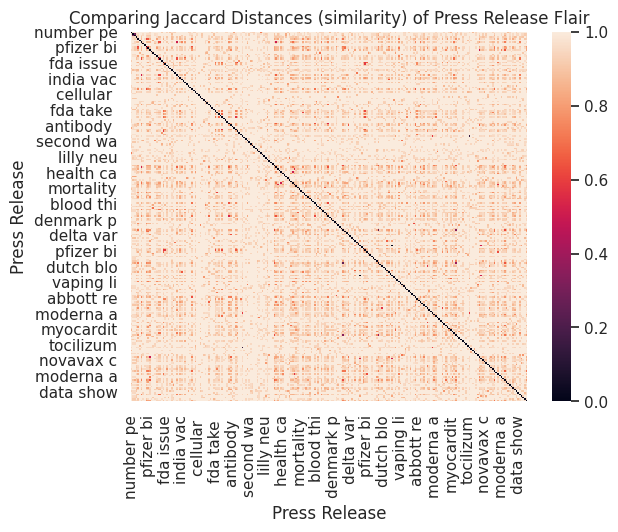

In [46]:
sns.heatmap(Press_df).set(title = 'Comparing Jaccard Distances (similarity) of Press Release Flair', \
                        xlabel = 'Press Release', ylabel = 'Press Release')

[Text(0.5, 1.0, 'Comparing Jaccard Distances (similarity) of Preprint Flair'),
 Text(0.5, 19.049999999999997, 'Preprint'),
 Text(46.24999999999999, 0.5, 'Preprint')]

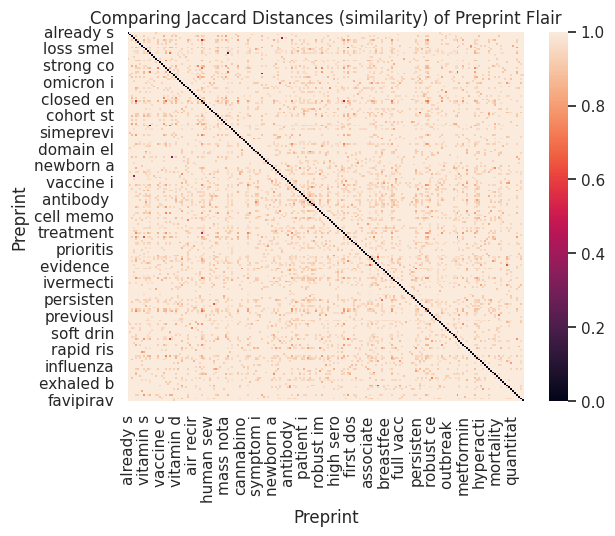

In [50]:
sns.heatmap(Print_df).set(title = 'Comparing Jaccard Distances (similarity) of Preprint Flair', \
                        xlabel = 'Preprint', ylabel = 'Preprint')

[Text(0.5, 1.0, 'Comparing Jaccard Distances (similarity) of Academic Flair'),
 Text(0.5, 19.049999999999997, 'Academic'),
 Text(46.24999999999999, 0.5, 'Academic')]

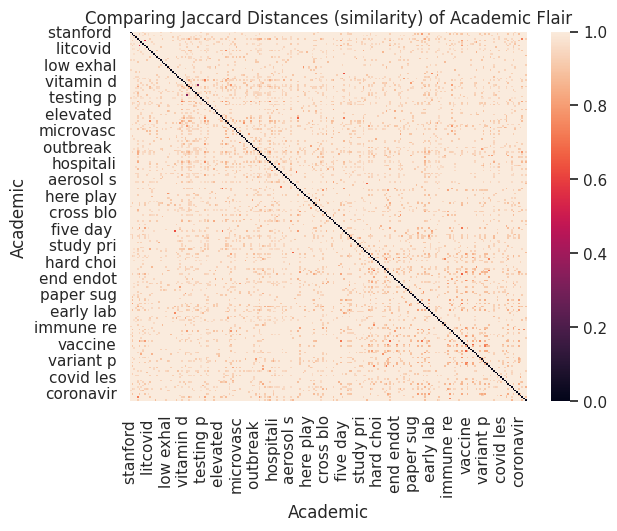

In [48]:
sns.heatmap(Acad_df).set(title = 'Comparing Jaccard Distances (similarity) of Academic Flair', \
                        xlabel = 'Academic', ylabel = 'Academic')

[Text(0.5, 1.0, 'Comparing Jaccard Distances (similarity) of General Flair'),
 Text(0.5, 19.049999999999997, 'General'),
 Text(46.24999999999999, 0.5, 'General')]

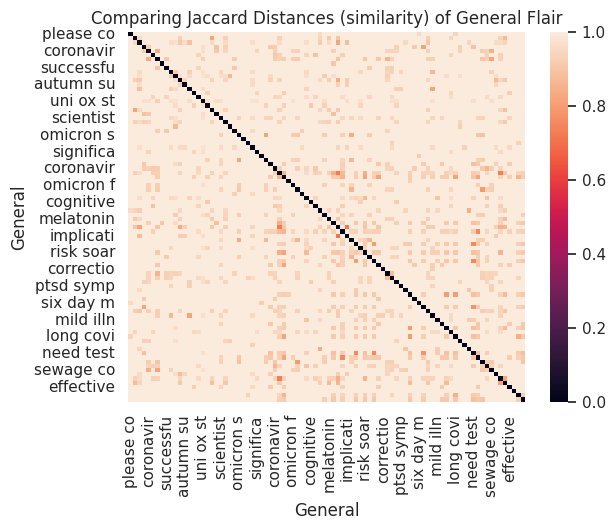

In [51]:
sns.heatmap(Gen_df).set(title = 'Comparing Jaccard Distances (similarity) of General Flair', \
                        xlabel = 'General', ylabel = 'General')

[Text(0.5, 1.0, 'Comparing Jaccard Distances (similarity) of General against Academic'),
 Text(0.5, 19.049999999999997, 'General'),
 Text(46.24999999999999, 0.5, 'Academic')]

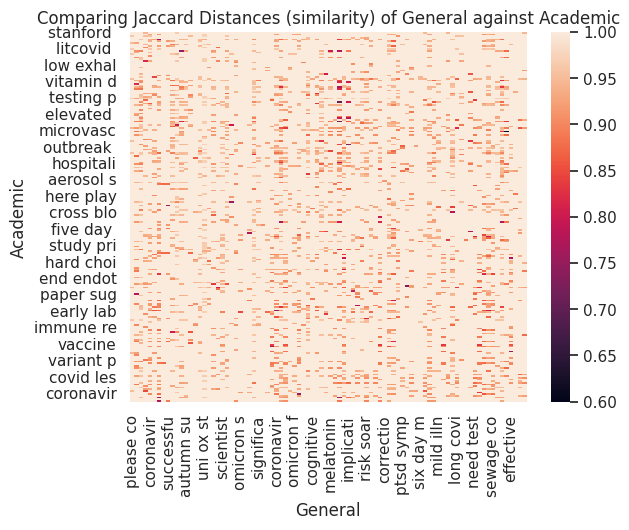

In [52]:
sns.heatmap(acadxgen_df).set(title = 'Comparing Jaccard Distances (similarity) of General against Academic', \
                             xlabel = 'General', ylabel = 'Academic')

[Text(0.5, 1.0, 'Comparing Jaccard Distances (similarity) of General+Academic'),
 Text(0.5, 19.049999999999997, 'General+Academic'),
 Text(46.24999999999999, 0.5, 'General+Academic')]

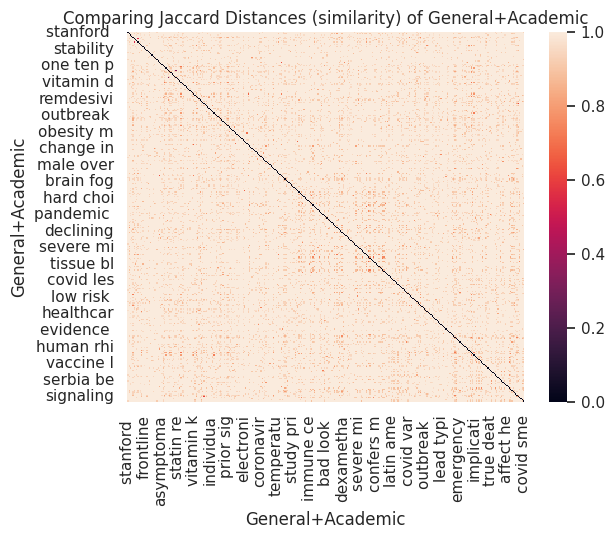

In [53]:
sns.heatmap(df_comb).set(title = 'Comparing Jaccard Distances (similarity) of General+Academic', \
                         xlabel = 'General+Academic', ylabel = 'General+Academic')

# Text

Collecting:

The relevant libraries for interacting with the Reddit API, NLP, distance metrics, and visualising data were installed throughout.

Through interacting with the Reddit API, submissions from the ‘Covid-19’ subreddit were retrieved. This topic is recent and controversial, therefore assumable that submissions would contain varied language, due to different sub-topics (advice, updates, questions, debate), distinguishing them.

This data set consists of all the 'top' posts from a specific subreddit with an identifiable theme. The ‘top’ submissions were retrieved as this contained those with the most “upvotes”, advantageous compared to other methods - “hot” (new and popular) or “best”, but limited by the lack of account for “downvotes”, filtering off-topic posts. 
Under the overarching theme, the submissions in a subreddit are labelled by different “flairs”.
The aim was to understand how distinct and accurate the categorisation of submissions in this subreddit by flair type are, through comparing the similarity of language in each. The accuracy is not determined by whether the flairs’ meaning relates to their associated submissions’ content, but instead how similar the submissions within them are, or less related to those in others, dictating whether these labels are useful and relevant.
Different elements were retrieved to form the data frame. Titles were used instead of the content or comments, due to focus on their categorisation. NSFW was included to remove inappropriate posts, but it was later shown all submissions were NSFW, therefore ignored.

Preparing:

The corpus was prepared by organising the retrieved data into a CVS file, for ease of import and extraction of data text and information.

A list of flair types was gathered, empty values removed, those with the most submissions were located.
The flairs' attributed titles were organised into these lists. The two academic flairs were grouped to maximise the data entries, though this may have drawbacks regarding category distinction.
Duplicate entries under different flairs meant using a dictionary for this wasn’t possible.

Processing:

Submission titles in the top flairs were tokenised, regularised, and lemmatised. This involved removing special characters, stop-words, punctuation, and numbers. 

Stemming wasn’t included due to removing necessary distinction in language.

Analysing and Visualising:

Jaccard distances were found between all the submissions in each of the top flair categories, and between the grouped academic/general category.
This distance metric was used as it measures similarity of the text irrespective of order, important for this corpus because words were not likely in the same order and the aim was understanding similarities between what the submissions were communicating, not whether a title resembles others word-for-word.

However, the Jaccard Distances as averages showed instead that submissions in each flair are not similar. Heat maps, demonstrating this within each category, and between them, again showed limited reflection of similarity. Even when comparing two categories’ distances side-by-side, closeness is still not observed.

Perhaps they are indistinguishable because the contextual language (covid, vaccine,…) is consistent throughout, therefore a topics narrative and formality determines categorisation, which this distance metric cannot communicate despite processes performed previously.

This work contains 500 words.